In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
conn=sqlite3.connect('/content/drive/MyDrive/Data/spotify.sqlite')


In [3]:
cur = conn.cursor()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
cur.execute(query)
cur.fetchall()

[('albums',),
 ('artists',),
 ('audio_features',),
 ('genres',),
 ('r_albums_artists',),
 ('r_albums_tracks',),
 ('r_artist_genre',),
 ('r_track_artist',),
 ('tracks',)]

In [5]:
conn.text_factory = lambda x: str(x, 'latin1')


In [6]:
query = "SELECT * FROM albums LIMIT 10;"
pd.read_sql(query, conn)

,id,name,album_group,album_type,release_date,popularity
0,2jKoVlU7VAmExKJ1Jh3w9P,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",,album,954633600000,0
1,4JYUDRtPZuVNi7FAnbHyux,"Flava in Ya Ear Remix (feat. Notorious B.I.G.,...",,single,757382400000,0
2,6YjKAkDYmlasMqYw73iB0w,Bitch Please II,,album,959040000000,0
3,2YlvHjDb4Tyxl4A1IcDhAe,Just Dippin',,compilation,1104537600000,0
4,3UOuBNEin5peSRqdzvlnWM,Still D.R.E.,,album,942710400000,0
5,2g8HN35AnVGIk7B8yMucww,Big Poppa - 2005 Remaster,,album,779414400000,0
6,7iL6o9tox1zgHpKUfh9vuC,In Da Club,,album,1044489600000,0
7,6KIKRz9eSTXdNsGUnomdtW,Straight Outta Compton,,album,587001600000,0
8,33ZXjLCpiINn8eQIDYEPTD,"Shook Ones, Pt. II",,album,798768000000,0
9,7N1Vjtzr1lmmCW9iasQ8YO,Survival of the Fittest,,album,798768000000,0


In [7]:
query = "PRAGMA table_info(artists)"
pd.read_sql(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,name,,0,None,0
1,1,id,,0,None,0
2,2,popularity,,0,None,0
3,3,followers,,0,None,0


In [8]:
query = "SELECT * FROM audio_features LIMIT 10;"
pd.read_sql(query, conn)

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2jKoVlU7VAmExKJ1Jh3w9P,0.1800,https://api.spotify.com/v1/audio-analysis/2jKo...,0.893,219160,0.514,0.000000,11,0.0596,-5.080,1,0.283,95.848000,4,0.787
1,4JYUDRtPZuVNi7FAnbHyux,0.2720,https://api.spotify.com/v1/audio-analysis/4JYU...,0.520,302013,0.847,0.000000,9,0.3250,-5.300,1,0.427,177.371002,4,0.799
2,6YjKAkDYmlasMqYw73iB0w,0.0783,https://api.spotify.com/v1/audio-analysis/6YjK...,0.918,288200,0.586,0.000000,1,0.1450,-2.890,1,0.133,95.516998,4,0.779
3,2YlvHjDb4Tyxl4A1IcDhAe,0.5840,https://api.spotify.com/v1/audio-analysis/2Ylv...,0.877,243013,0.681,0.000000,1,0.1190,-6.277,0,0.259,94.834999,4,0.839
4,3UOuBNEin5peSRqdzvlnWM,0.1700,https://api.spotify.com/v1/audio-analysis/3UOu...,0.814,270667,0.781,0.000518,11,0.0520,-3.330,1,0.233,93.445000,4,0.536
5,2g8HN35AnVGIk7B8yMucww,0.4300,https://api.spotify.com/v1/audio-analysis/2g8H...,0.780,252747,0.575,0.000000,9,0.1430,-7.247,0,0.273,84.491997,4,0.773
6,7iL6o9tox1zgHpKUfh9vuC,0.2550,https://api.spotify.com/v1/audio-analysis/7iL6...,0.899,193467,0.713,0.000000,6,0.0708,-2.752,0,0.366,90.051003,4,0.777
7,6KIKRz9eSTXdNsGUnomdtW,0.0461,https://api.spotify.com/v1/audio-analysis/6KIK...,0.834,258688,0.878,0.000000,8,0.3340,-9.484,1,0.150,102.848000,4,0.418
8,33ZXjLCpiINn8eQIDYEPTD,0.0146,https://api.spotify.com/v1/audio-analysis/33ZX...,0.763,325507,0.786,0.011400,10,0.0817,-6.472,0,0.229,93.857002,4,0.504
9,7N1Vjtzr1lmmCW9iasQ8YO,0.1250,https://api.spotify.com/v1/audio-analysis/7N1V...,0.813,224533,0.703,0.000001,11,0.2370,-5.077,0,0.268,94.828003,4,0.241


In [9]:
query = "SELECT * FROM tracks LIMIT 10;"
pd.read_sql(query, conn)

,id,disc_number,duration,explicit,audio_feature_id,name,preview_url,track_number,popularity,is_playable
0,1dizvxctg9dHEyaYTFufVi,1,275893,1,1dizvxctg9dHEyaYTFufVi,Gz And Hustlas (feat. Nancy Fletcher),,12,0,NaN
1,2g8HN35AnVGIk7B8yMucww,1,252746,1,2g8HN35AnVGIk7B8yMucww,Big Poppa - 2005 Remaster,https://p.scdn.co/mp3-preview/770e023eb0318270...,13,77,NaN
2,49pnyECzcMGCKAqxfTB4JZ,3,315080,0,49pnyECzcMGCKAqxfTB4JZ,"You Were Born - Early Version Of ""One Of The T...",,6,8,1.0
3,4E5IFAXCob6QqZaJMTw5YN,1,240800,1,4E5IFAXCob6QqZaJMTw5YN,Poppin' Them Thangs,https://p.scdn.co/mp3-preview/f3b556ced9657f89...,2,70,NaN
4,1gSt2UlC7mtRtJIc5zqKWn,2,203666,0,1gSt2UlC7mtRtJIc5zqKWn,"It's Hard To Say ""I Do"", When I Don't",,2,50,NaN
5,67IvfvAMYQzJEeHopvwMMW,1,173159,1,67IvfvAMYQzJEeHopvwMMW,Simon Says,https://p.scdn.co/mp3-preview/e61bbb32e233ab49...,1,62,NaN
6,2I9foKseoFQh07p6sD2voE,1,256226,1,2I9foKseoFQh07p6sD2voE,Many Men (Wish Death),https://p.scdn.co/mp3-preview/01e209d8c8c1fa7a...,4,68,NaN
7,6MbxtmdQYE6eljl9sntLZt,1,250226,1,6MbxtmdQYE6eljl9sntLZt,"The Gangsta, The Killa And The Dope Dealer",https://p.scdn.co/mp3-preview/138cf390c1dfc0b3...,2,56,NaN
8,6Q3Fb6Co1NgIQ9njENgYSK,1,251400,1,6Q3Fb6Co1NgIQ9njENgYSK,Flow Forever,https://p.scdn.co/mp3-preview/1a236123d1254333...,2,43,NaN
9,6YjKAkDYmlasMqYw73iB0w,2,288200,1,6YjKAkDYmlasMqYw73iB0w,Bitch Please II,,15,0,NaN


In [10]:
query = "SELECT * FROM artists LIMIT 10;"
pd.read_sql(query, conn)


,name,id,popularity,followers
0,Xzibit,4tujQJicOnuZRLiBFdp3Ou,69,1193665
1,Erick Sermon,2VX0o9LDIVmKIgpnwdJpOJ,54,142007
2,J. Ro,3iBOsmwGzRKyR0vs2I61xP,45,158
3,Tash,22qf8cJRzBjIWb2Jc4JeOr,48,3421
4,Craig Mack,4akj4uteQQrrGxhX9Rjuyf,55,161966
5,Eminem,7dGJo4pcD2V6oG8kP0tJRR,94,43882754
6,Dr. Dre,6DPYiyq5kWVQS4RGwxzPC7,83,5591634
7,Snoop Dogg,7hJcb9fa4alzcOq3EaNPoG,87,6831895
8,Nate Dogg,1Oa0bMld0A3u5OTYfMzp5h,80,1026728
9,Jewell,05cqfWVtssCo3KVcqEAYG3,54,1060


# New Section

In [22]:
query = """ SELECT artists.name AS artist_name, AVG(tracks.popularity) AS avg_track_popularity FROM artists JOIN r_track_artist ON artists.id = r_track_artist.artist_id JOIN tracks ON r_track_artist.track_id = tracks.id GROUP BY artists.id ORDER BY avg_track_popularity DESC LIMIT 10; """
import pandas as pd
pd.read_sql(query, conn)

,artist_name,avg_track_popularity
0,Silk Sonic,96.000000
1,Mufasa & Hypeman,94.000000
2,Dopamine,94.000000
3,Bella Poarch,92.000000
4,HVME,90.500000
5,Nuka,86.000000
6,Willow Sage Hart,86.000000
7,Crissin,85.000000
8,Flow La Movie,84.666667
9,THE SCOTTS,84.000000


Here we see avg_track_popularity for 10 artists


In [23]:
query = """ SELECT album_type, COUNT(*) AS total_tracks FROM albums GROUP BY album_type; """
pd.read_sql(query, conn)

,album_type,total_tracks
0,album,3612835
1,compilation,766770
2,single,441149


Here we see the total track count for each album type


In [24]:
query = """ SELECT AVG(popularity) AS avg_track_popularity FROM tracks; """
pd.read_sql(query, conn)

,avg_track_popularity
0,6.118262


Here we see the average popularity of all tracks.


In [25]:
query = """ SELECT name AS artist_name, followers FROM artists ORDER BY followers DESC LIMIT 5; """
pd.read_sql(query, conn)

,artist_name,followers
0,Ed Sheeran,78503098
1,Ariana Grande,60762233
2,Drake,54142733
3,Eminem,43882754
4,Rihanna,42093194


Here we see the 5 most popular artists based on followers

In [26]:
query = """ SELECT AVG(popularity) AS avg_album_popularity FROM albums; """
pd.read_sql(query, conn)

,avg_album_popularity
0,2.152412


Here we see the calculation of average popularity of all albums

In [27]:
query = """ SELECT album_type, AVG(popularity) AS avg_popularity FROM albums GROUP BY album_type ORDER BY avg_popularity DESC; """
pd.read_sql(query, conn)

,album_type,avg_popularity
0,single,5.779671
1,album,1.963755
2,compilation,0.954435


Here we see the average popularity calculated for each album type, ranked from highest to lowest

In [28]:
query = """ SELECT albums.name AS album_name, COUNT(r_albums_tracks.track_id) AS track_count FROM albums JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id GROUP BY albums.id ORDER BY track_count DESC LIMIT 7; """
pd.read_sql(query, conn)

,album_name,track_count
0,The Count of Monte Cristo,1522
1,Die Bibel Gesamtausgabe - Altes und Neues Test...,1189
2,KJV Old Testament - King James Version (Non-Dr...,930
3,ESV Old Testament - English Standard Version (...,930
4,"666 Scary Halloween Sounds: Ghosts, Witches, M...",666
5,"666 Scary Halloween Sounds: Ghosts, Witches, M...",666
6,Ð¢ÑÐ¸ÑÐ¼ÑÐ°Ð»ÑÐ½Ð°Ñ Ð°ÑÐºÐ°,666


This code shows the top 7 albums that have the most tracks associated with them

In [30]:
query = """ SELECT genres.id AS genre_name, AVG(tracks.popularity) AS avg_track_popularity FROM genres JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id JOIN tracks ON r_track_artist.track_id = tracks.id GROUP BY genres.id ORDER BY avg_track_popularity DESC LIMIT 5;"""
pd.read_sql(query, conn)

,genre_name,avg_track_popularity
0,instrumental lullaby,47.348968
1,dream smp,46.300000
2,hypnosis mic,44.680000
3,himachali pop,39.500000
4,melodic rap,37.983932


Here we see the top 5 genres with the highest average track popularity


In [31]:
query = """ SELECT albums.name AS album_name, AVG(tracks.popularity) AS avg_track_popularity FROM albums JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id JOIN tracks ON r_albums_tracks.track_id = tracks.id GROUP BY albums.id ORDER BY avg_track_popularity DESC LIMIT 8; """
pd.read_sql(query, conn)

,album_name,avg_track_popularity
0,drivers license,100.0
1,Butter,100.0
2,MONTERO (Call Me By Your Name),99.0
3,good 4 u,99.0
4,Astronaut In The Ocean,97.0
5,good 4 u,97.0
6,Leave The Door Open,96.0
7,Todo De Ti,96.0


Here we see the top 8 albums with the highest average track popularity

In [32]:
query = """ SELECT tracks.name AS track_name, COUNT(DISTINCT r_track_artist.artist_id) AS artist_count FROM tracks JOIN r_track_artist ON tracks.id = r_track_artist.track_id GROUP BY tracks.id HAVING artist_count > 1 ORDER BY artist_count DESC LIMIT 5; """
pd.read_sql(query, conn)

,track_name,artist_count
0,é£é³¥,52
1,Tom and Jerry,49
2,The Way Old Friends Do,49
3,I've Got A Heart Filled With Love (For You Dea...,48
4,Golden Earrings,48


Here we see the top 5 tracks with the most collaborating artists

In [33]:
query = """ SELECT albums.name AS album_name, tracks.name AS track_name, MAX(tracks.duration) AS longest_track_duration FROM albums JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id JOIN tracks ON r_albums_tracks.track_id = tracks.id GROUP BY albums.id ORDER BY longest_track_duration DESC LIMIT 5; """
pd.read_sql(query, conn)

,album_name,track_name,longest_track_duration
0,Pride and Prejudice - Jane Austen,Pride and Prejudice - Jane Austen Part 1 of 2,19672058
1,Sense and Sensibility - Jane Austen,Sense and Sensibility - Jane Austen Part 1 of 2,19080542
2,"JOOF Editions, Vol. 3 - The Journey","JOOF Editions, Vol. 3 - The Journey - Continuo...",17457230
3,The Secret Garden - Frances Hodgson Burnett,The Secret Garden - Frances Hodgson Burnett Pa...,17322553
4,Fusion Records Yearmix 2017,Fusion Records Yearmix 2017 - Full Continuous Mix,16136782


Here we see the top 5 albums with their longest track durations

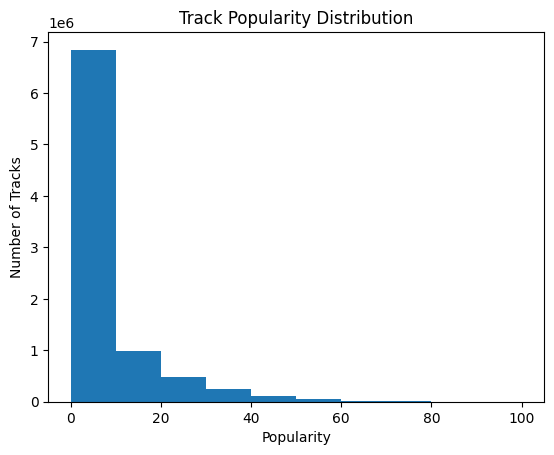

In [34]:
query = """
SELECT
    popularity
FROM tracks
WHERE popularity IS NOT NULL;
"""
df = pd.read_sql(query, conn)

df['popularity'].plot(kind='hist', bins=10, title="Track Popularity Distribution")
import matplotlib.pyplot as plt
plt.xlabel("Popularity")
plt.ylabel("Number of Tracks")
plt.show()

Here we visualize the distribution of track popularity using a histogram.

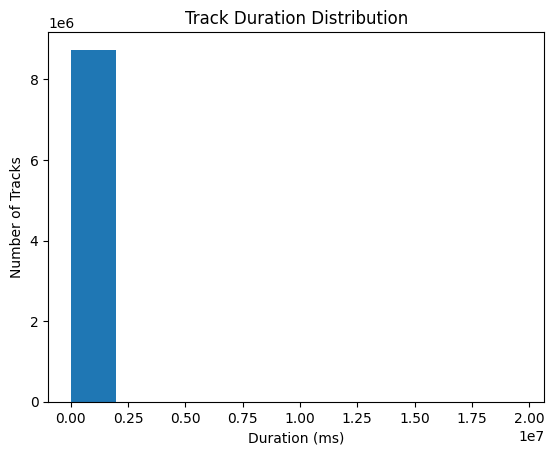

In [ ]:
query = """
SELECT
    duration
FROM tracks
WHERE duration IS NOT NULL;
"""
df = pd.read_sql(query, conn)

df['duration'].plot(kind='hist', bins=10, title="Track Duration Distribution")
import matplotlib.pyplot as plt
plt.xlabel("Duration (ms)")
plt.ylabel("Number of Tracks")
plt.show()

In [ ]:
query = """
SELECT artists.name, COUNT(tracks.id) AS track_count
FROM artists
JOIN r_albums_artists ON artists.id = r_albums_artists.artist_id
JOIN albums ON r_albums_artists.album_id = albums.id
JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id
JOIN tracks ON r_albums_tracks.track_id = tracks.id
GROUP BY artists.name
ORDER BY track_count DESC;
"""
pd.read_sql(query, conn)

,name,track_count
0,Various Artists,1341204
1,Johann Sebastian Bach,47902
2,Wolfgang Amadeus Mozart,43155
3,Ludwig van Beethoven,26588
4,FrÃ©dÃ©ric Chopin,17629
...,...,...
439763,#1 Carnival Songs,1
439764,#####,1
439765,"""Lil Jay""",1
439766,"""Chicken Girls"" Cast",1


In [ ]:
query = """SELECT artists.name, COUNT(DISTINCT albums.id) AS album_count
FROM artists
JOIN r_albums_artists ON artists.id = r_albums_artists.artist_id
JOIN albums ON r_albums_artists.album_id = albums.id
GROUP BY artists.id
HAVING album_count > 1  LIMIT 10;
"""
pd.read_sql(query, conn)

,name,album_count
0,Motion Drive,2
1,Thug Brothers,3
2,Darren Gibson,2
3,Moxa,2
4,Javier LimÃ³n,4
5,IZA,2
6,One Way,6
7,A Setting Sun,23
8,Disco Ensemble,4
9,Radiancematrix,2


Here we see artist who have more than 1 albums


In [ ]:
query = """SELECT * FROM r_artist_genre LIMIT 10;"""
pd.read_sql(query, conn)

,genre_id,artist_id
0,detroit hip hop,4tujQJicOnuZRLiBFdp3Ou
1,g funk,4tujQJicOnuZRLiBFdp3Ou
2,gangster rap,4tujQJicOnuZRLiBFdp3Ou
3,hardcore hip hop,4tujQJicOnuZRLiBFdp3Ou
4,hip hop,4tujQJicOnuZRLiBFdp3Ou
5,pop rap,4tujQJicOnuZRLiBFdp3Ou
6,rap,4tujQJicOnuZRLiBFdp3Ou
7,west coast rap,4tujQJicOnuZRLiBFdp3Ou
8,gangster rap,2VX0o9LDIVmKIgpnwdJpOJ
9,hardcore hip hop,2VX0o9LDIVmKIgpnwdJpOJ


In [13]:
query = """SELECT artists.name, COUNT(DISTINCT genres.id) AS genre_count
FROM artists
JOIN r_artist_genre ON artists.id = r_artist_genre.artist_id
JOIN genres ON r_artist_genre.genre_id = genres.id
GROUP BY artists.id
HAVING genre_count > 1
LIMIT 10;"""
pd.read_sql(query, conn)


,name,genre_count
0,Thug Brothers,2
1,Thai Trinh,2
2,One Way,8
3,Disco Ensemble,2
4,Mercy Killing,3
5,Stella,2
6,Hirsute,2
7,Solace Her,2
8,Wiener Philharmoniker,4
9,Peter Wolf,2


In [14]:
query = """
SELECT
    artists.popularity AS artist_popularity,
    artists.followers AS artist_followers,
    tracks.popularity AS track_popularity,
    tracks.duration AS track_duration,
    audio_features.energy AS energy,
    audio_features.valence AS valence,
    audio_features.danceability AS danceability,
    audio_features.tempo AS tempo
FROM artists
JOIN r_track_artist ON artists.id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
JOIN audio_features ON tracks.audio_feature_id = audio_features.id;
"""
df = pd.read_sql(query, conn)


In [15]:
df.head()

,artist_popularity,artist_followers,track_popularity,track_duration,energy,valence,danceability,tempo
0,69,1193665,0,317946,0.794,0.357,0.654,85.248001
1,69,1193665,20,333360,0.585,0.534,0.784,96.084000
2,69,1193665,58,272506,0.740,0.605,0.843,85.889999
3,69,1193665,0,227266,0.670,0.891,0.409,89.574997
4,69,1193665,0,171933,0.771,0.325,0.534,128.996002


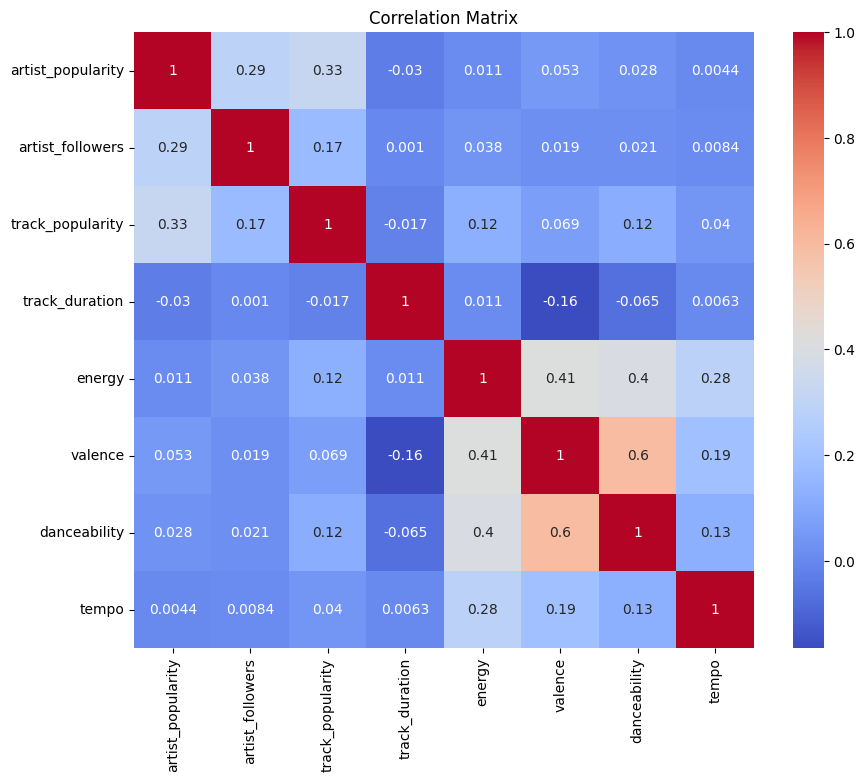

In [16]:

correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Here we see that the number of followers of the artist and the popularity of the artist are positively correlated, which is expected.
 we can also see that the more danceable the music, the more energetic is the music and also more popular

In [ ]:

pd.read_sql_query('''
SELECT
    artists.name AS artist_name,
    genres.id AS genre_name,
    artists.popularity as artists_popularity
FROM
    artists
JOIN
    r_artist_genre ON artists.id = r_artist_genre.artist_id
JOIN
    genres ON r_artist_genre.genre_id = genres.id
WHERE
    artists.popularity > 80
ORDER BY
    artists.popularity DESC
limit 10;
''', conn)

,artist_name,genre_name,artists_popularity
0,Drake,canadian hip hop,98
1,Drake,canadian pop,98
2,Drake,hip hop,98
3,Drake,pop rap,98
4,Drake,rap,98
5,Drake,toronto rap,98
6,Bad Bunny,latin,98
7,Bad Bunny,reggaeton,98
8,Bad Bunny,trap latino,98
9,Taylor Swift,pop,97


Here we see top 10 genres of artists


In [17]:
query = """
SELECT
    albums.name AS album_name,
    AVG(tracks.popularity) AS avg_track_popularity,
    albums.release_date
FROM albums
JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id
JOIN tracks ON r_albums_tracks.track_id = tracks.id
GROUP BY albums.id
ORDER BY avg_track_popularity DESC
LIMIT 10;
"""
pd.read_sql(query, conn)


,album_name,avg_track_popularity,release_date
0,drivers license,100.0,1610064000000
1,Butter,100.0,1621555200000
2,MONTERO (Call Me By Your Name),99.0,1616716800000
3,good 4 u,99.0,1621555200000
4,Astronaut In The Ocean,97.0,1609891200000
5,good 4 u,97.0,1620950400000
6,Leave The Door Open,96.0,1614902400000
7,Todo De Ti,96.0,1621468800000
8,Butter,96.0,1622764800000
9,The Business,96.0,1600214400000


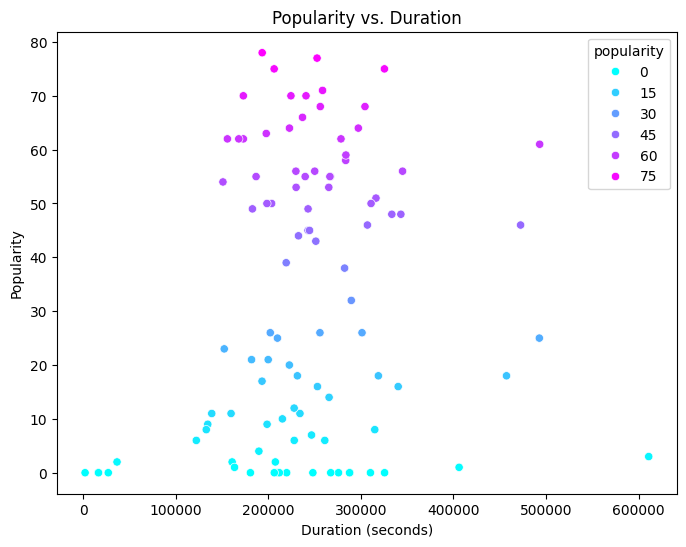

In [3]:

query = "SELECT name, duration, popularity FROM tracks LIMIT 100;"
tracks_df = pd.read_sql(query, conn)


plt.figure(figsize=(8, 6))
sns.scatterplot(data=tracks_df, x='duration', y='popularity', hue='popularity', palette='cool')
plt.title('Popularity vs. Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Popularity')
plt.show()


Here we can see that relationship between popularity and duration

In [9]:
query = """
SELECT a.name AS album_name, COUNT(t.id) AS track_count
FROM albums AS a
JOIN r_albums_tracks AS r ON a.id = r.album_id
JOIN tracks AS t ON r.track_id = t.id
GROUP BY a.id
ORDER BY track_count DESC
LIMIT 10;
"""
albums_df = pd.read_sql(query, conn)

/var/folders/_m/2snlpmxx36x5td7v0qcnt45c0000gp/T/ipykernel_12001/589330181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=albums_df, x='track_count', y='album_name', palette='Blues_d')


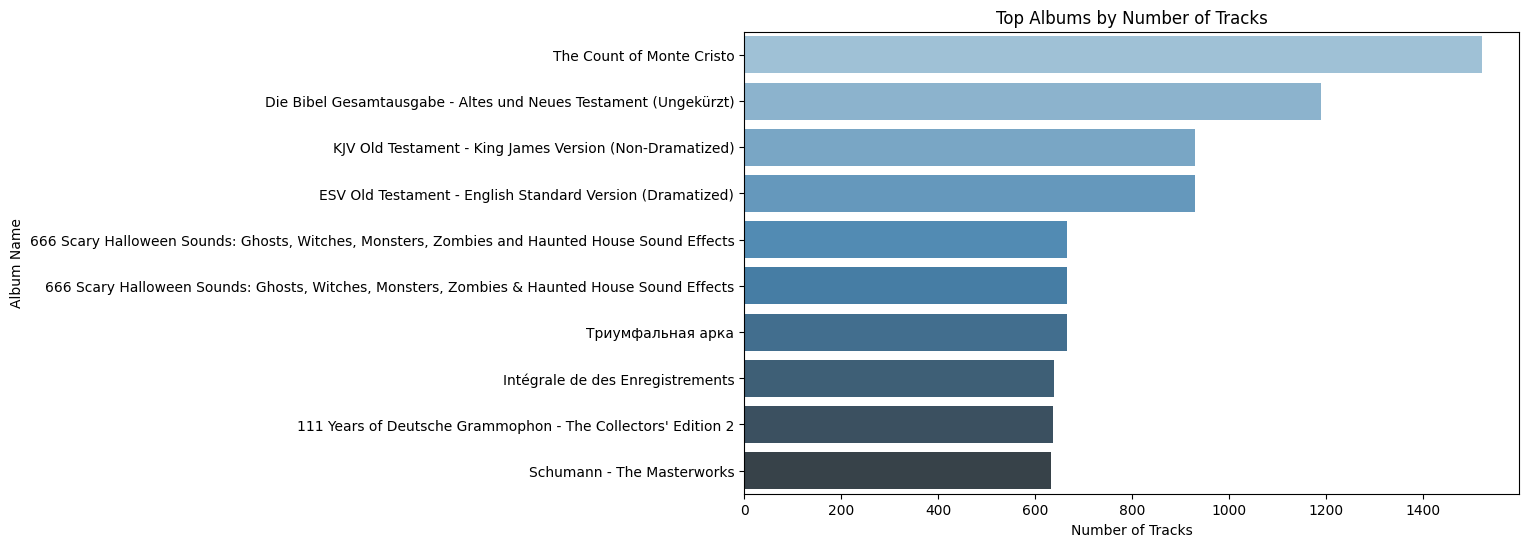

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=albums_df, x='track_count', y='album_name', palette='Blues_d')
plt.title('Top Albums by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Album Name')
plt.show()

Here we see 10 top albums that have many number of tracks

In [4]:
query = """
SELECT
    genres.id AS genre_id,
    AVG(tracks.popularity) AS avg_popularity
FROM genres
JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id
JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
GROUP BY genres.id
ORDER BY avg_popularity DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)


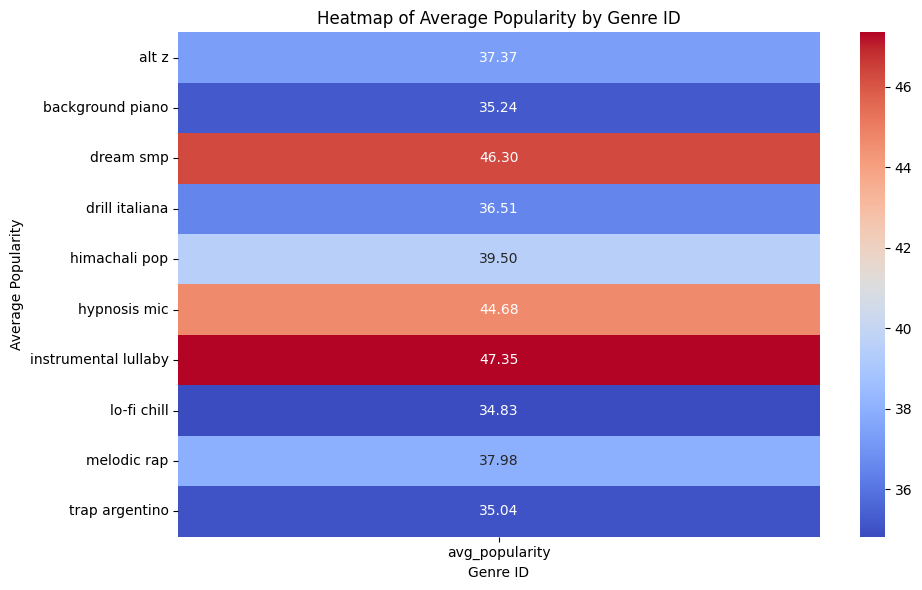

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df.pivot_table(index='genre_id', values='avg_popularity')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Heatmap of Average Popularity by Genre ID")
plt.xlabel("Genre ID")
plt.ylabel("Average Popularity")
plt.tight_layout()
plt.show()


Here wee see the popularity by genres,and the highest is instrumental lullaby

In [7]:
query = """
SELECT ar.name AS artist_name, AVG(t.popularity) AS avg_popularity
FROM artists AS ar
JOIN r_track_artist AS r ON ar.id = r.artist_id
JOIN tracks AS t ON r.track_id = t.id
GROUP BY ar.id
ORDER BY avg_popularity DESC
LIMIT 10;
"""
artists_df = pd.read_sql(query, conn)


/var/folders/_m/2snlpmxx36x5td7v0qcnt45c0000gp/T/ipykernel_12001/3472682217.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=artists_df, x='avg_popularity', y='artist_name', palette='viridis')


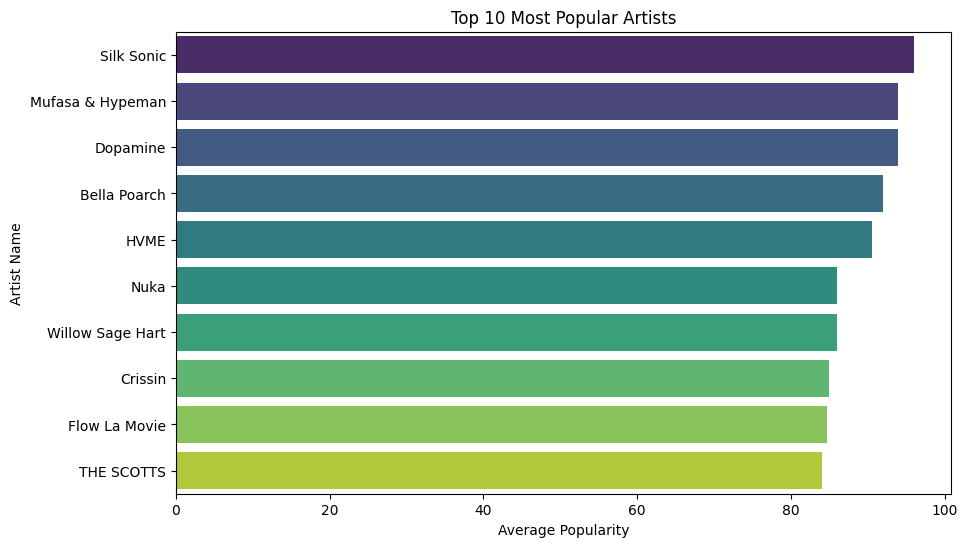

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=artists_df, x='avg_popularity', y='artist_name', palette='viridis')
plt.title('Top 10 Most Popular Artists')
plt.xlabel('Average Popularity')
plt.ylabel('Artist Name')
plt.show()

Here wee see top 10 artists with the help of this graph

In [6]:

query = """
SELECT a.name AS album_name, COUNT(t.id) AS track_count
FROM albums AS a
JOIN r_albums_tracks AS r ON a.id = r.album_id
JOIN tracks AS t ON r.track_id = t.id
GROUP BY a.id
ORDER BY track_count DESC
LIMIT 10;
"""
albums_df = pd.read_sql(query, conn)

In [7]:
fig = px.bar(
    albums_df, 
    x="track_count", 
    y="album_name", 
    orientation="h", 
    title="Top Albums by Number of Tracks", 
    labels={"track_count": "Number of Tracks", "album_name": "Album Name"},
    text="track_count",
)
fig.update_traces(marker_color="blue", textposition="outside")
fig.show()


Here we see 10 top albums that have many number of tracks,using different library


In [8]:
df_high_acousticness = pd.read_sql_query('''
SELECT
    tracks.name AS track_name,
    audio_features.acousticness,
    tracks.popularity
FROM
    audio_features
JOIN
    tracks ON audio_features.id = tracks.audio_feature_id
WHERE
    audio_features.acousticness > 0.8
ORDER BY
    tracks.popularity DESC
LIMIT 10;
''', conn)

In [9]:
fig = px.bar(
    df_high_acousticness,
    x='track_name',
    y='popularity',
    color='acousticness',
    title='Top Tracks with High Acousticness Scores',
    labels={'track_name': 'Track Name', 'popularity': 'Popularity'},
    color_continuous_scale='blues'
)
fig.update_layout(xaxis_title='Track Name', yaxis_title='Popularity', xaxis_tickangle=-45)
fig.show()

Here we see top tracks by high acousticness scores


In [12]:
df_high_acousticness = pd.read_sql_query('''
SELECT name AS track_name, popularity
FROM tracks
WHERE popularity IS NOT NULL
ORDER BY popularity DESC
LIMIT 10;
''', conn)

In [13]:
fig = px.bar(df_high_acousticness, 
             x='track_name', 
             y='popularity', 
             title='Top 10 Tracks by Popularity',
             labels={'track_name': 'Track Name', 'popularity': 'Popularity Score'},
             text='popularity')

fig.update_traces(marker_color='dodgerblue', textposition='outside')
fig.show()

Here we see top 10 tracks by poularity


In [8]:
query = "SELECT * FROM audio_features LIMIT 10;"

data = pd.read_sql_query(query, conn)

In [9]:
data

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2jKoVlU7VAmExKJ1Jh3w9P,0.1800,https://api.spotify.com/v1/audio-analysis/2jKo...,0.893,219160,0.514,0.000000,11,0.0596,-5.080,1,0.283,95.848000,4,0.787
1,4JYUDRtPZuVNi7FAnbHyux,0.2720,https://api.spotify.com/v1/audio-analysis/4JYU...,0.520,302013,0.847,0.000000,9,0.3250,-5.300,1,0.427,177.371002,4,0.799
2,6YjKAkDYmlasMqYw73iB0w,0.0783,https://api.spotify.com/v1/audio-analysis/6YjK...,0.918,288200,0.586,0.000000,1,0.1450,-2.890,1,0.133,95.516998,4,0.779
3,2YlvHjDb4Tyxl4A1IcDhAe,0.5840,https://api.spotify.com/v1/audio-analysis/2Ylv...,0.877,243013,0.681,0.000000,1,0.1190,-6.277,0,0.259,94.834999,4,0.839
4,3UOuBNEin5peSRqdzvlnWM,0.1700,https://api.spotify.com/v1/audio-analysis/3UOu...,0.814,270667,0.781,0.000518,11,0.0520,-3.330,1,0.233,93.445000,4,0.536
5,2g8HN35AnVGIk7B8yMucww,0.4300,https://api.spotify.com/v1/audio-analysis/2g8H...,0.780,252747,0.575,0.000000,9,0.1430,-7.247,0,0.273,84.491997,4,0.773
6,7iL6o9tox1zgHpKUfh9vuC,0.2550,https://api.spotify.com/v1/audio-analysis/7iL6...,0.899,193467,0.713,0.000000,6,0.0708,-2.752,0,0.366,90.051003,4,0.777
7,6KIKRz9eSTXdNsGUnomdtW,0.0461,https://api.spotify.com/v1/audio-analysis/6KIK...,0.834,258688,0.878,0.000000,8,0.3340,-9.484,1,0.150,102.848000,4,0.418
8,33ZXjLCpiINn8eQIDYEPTD,0.0146,https://api.spotify.com/v1/audio-analysis/33ZX...,0.763,325507,0.786,0.011400,10,0.0817,-6.472,0,0.229,93.857002,4,0.504
9,7N1Vjtzr1lmmCW9iasQ8YO,0.1250,https://api.spotify.com/v1/audio-analysis/7N1V...,0.813,224533,0.703,0.000001,11,0.2370,-5.077,0,0.268,94.828003,4,0.241


And below with the help of sns library, we can see all graph combinations for each variable, which allow us to gain initial insights for the relationships

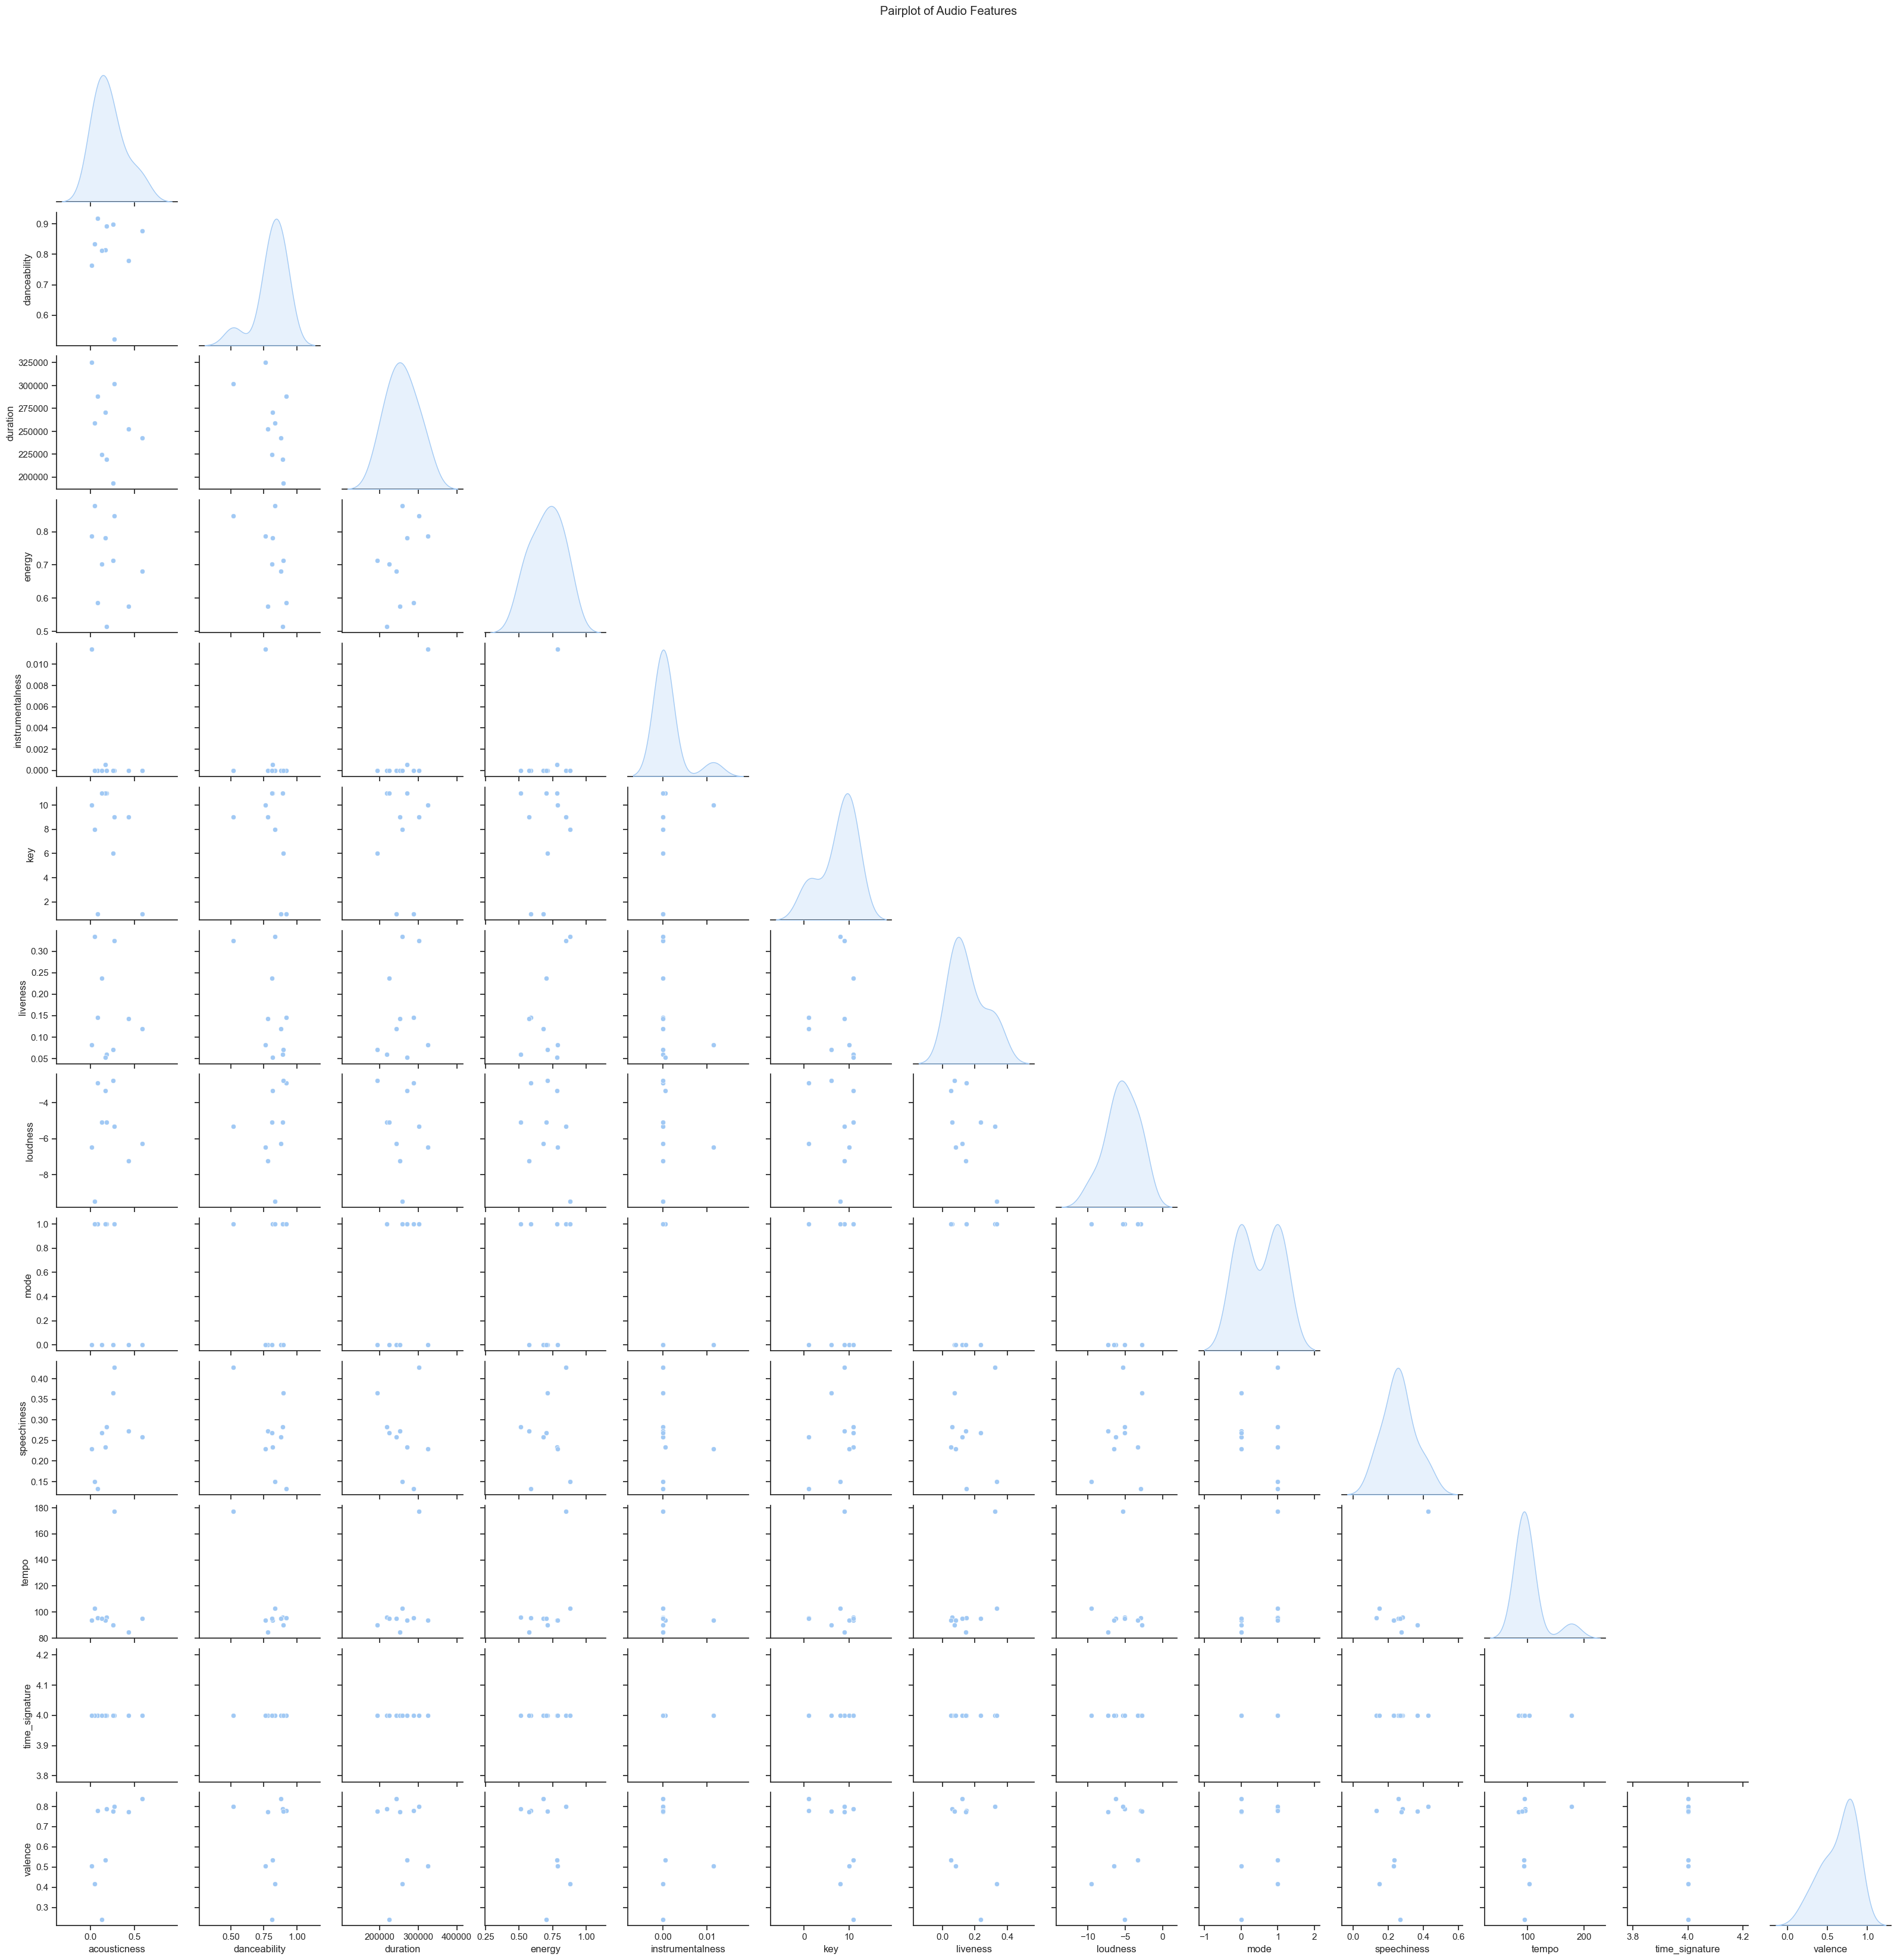

In [11]:
sns.set(style="ticks", palette="pastel")
pairplot = sns.pairplot(data, diag_kind="kde", corner=True)
pairplot.fig.suptitle("Pairplot of Audio Features", y=1.02)
plt.show()

In [14]:
query = "SELECT * FROM audio_features LIMIT 10;"

data = pd.read_sql(query, conn)

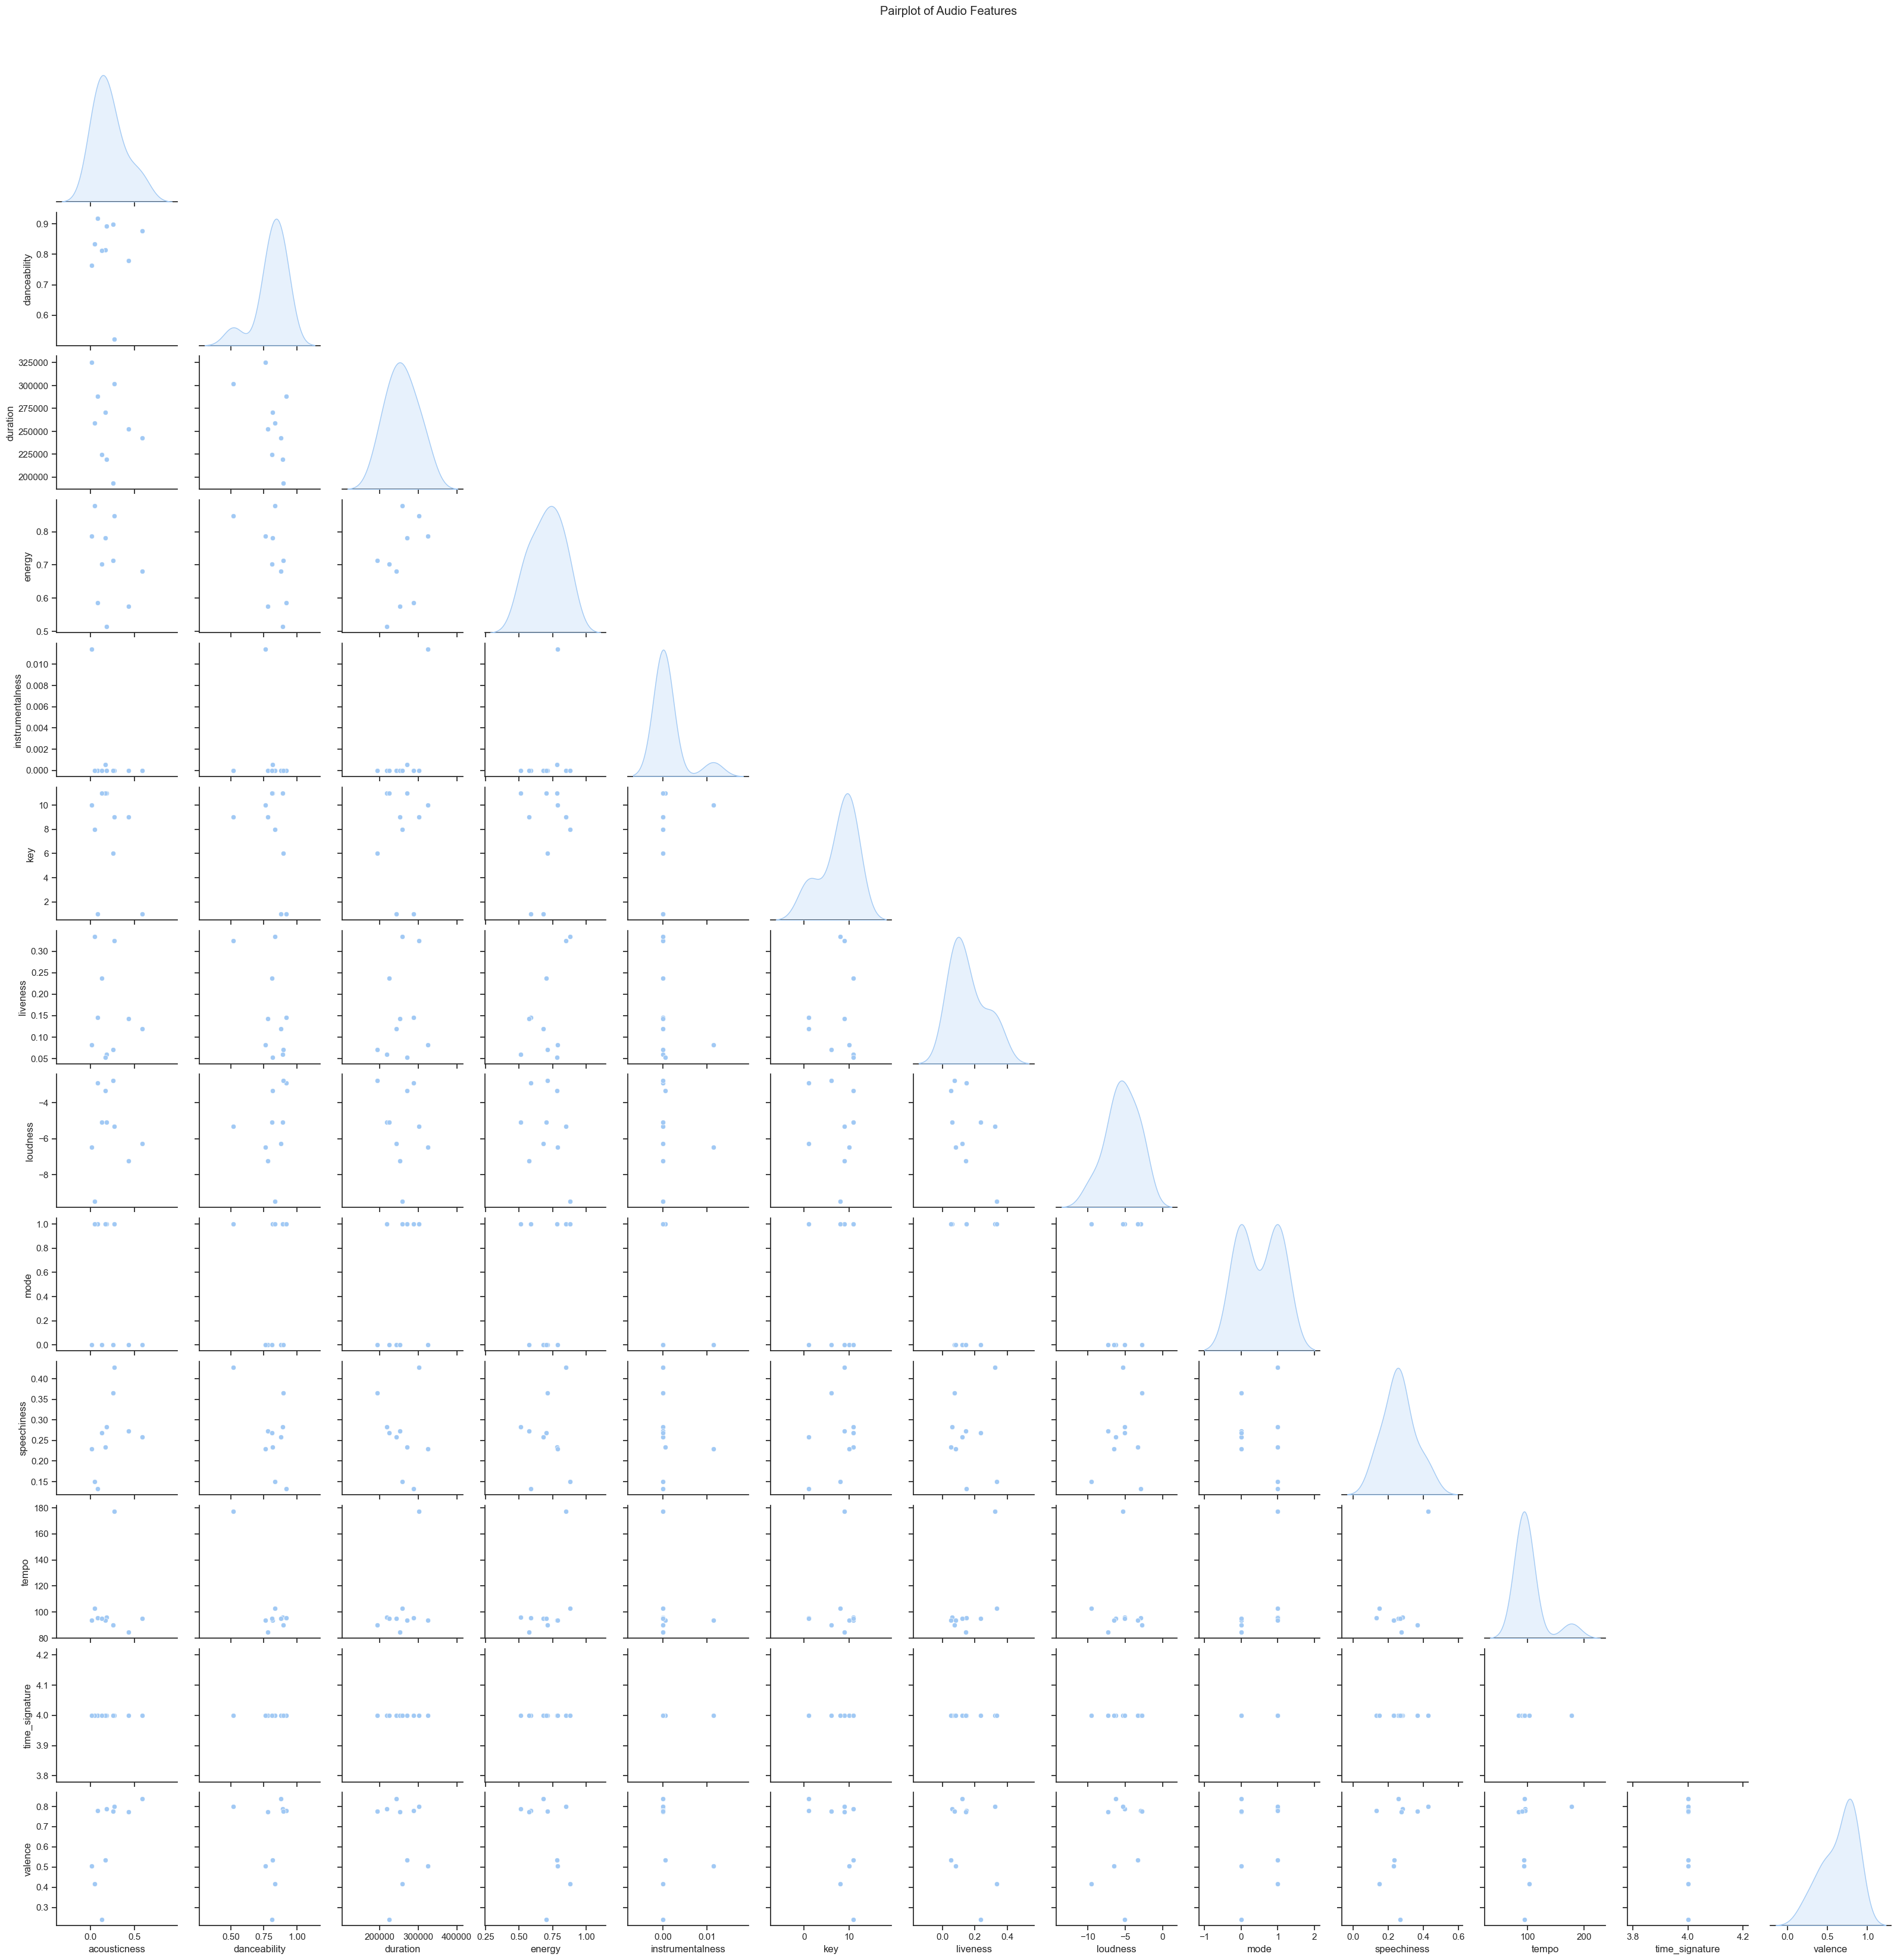

In [15]:
sns.set(style="ticks", palette="pastel")
pairplot = sns.pairplot(data, diag_kind="kde", corner=True)
pairplot.fig.suptitle("Pairplot of Audio Features", y=1.02)
plt.show()